<a href="https://colab.research.google.com/github/Shubham080997/TED_VIEWS-/blob/main/Copy_of_Ted_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_original=pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 5/Week 2/Day 1/data_ted_talks.csv')
data_original

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [4]:
data=data_original.copy()
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [5]:
#@title EDA

In [5]:
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [11]:
data=data.drop('url',axis=1)
data.shape

(3338, 18)

In [12]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'description', 'transcript'],
      dtype='object')

In [13]:
data=data.drop('talk_id',axis=1)
data.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript'],
      dtype='object')

In [15]:
#@title Visualizations { display-mode: "form" }

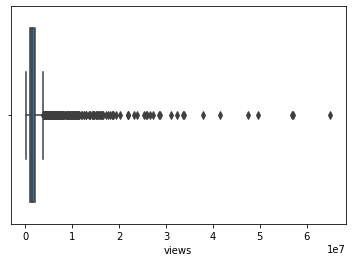

In [14]:
sns.boxplot(x=data['views'])

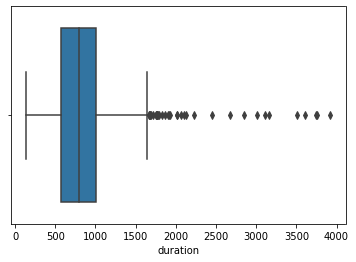

In [15]:
sns.boxplot(x=data['duration'])

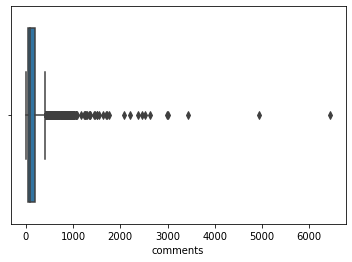

In [16]:
sns.boxplot(x=data['comments'])

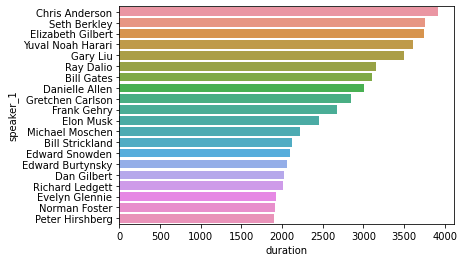

In [17]:
#Lets see who talked a lot - top 20
import seaborn as sns
ax = sns.barplot(x="duration", y="speaker_1", data=data.sort_values('duration', ascending=False)[:20])

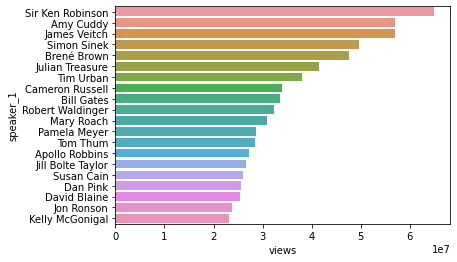

In [18]:
ax = sns.barplot(x="views", y="speaker_1", data=data.sort_values('views', ascending=False)[:20])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


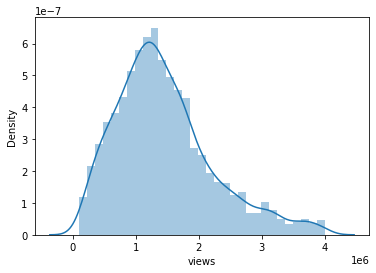

In [19]:
#let's see the distribution of views
sns.distplot(data[data['views'] < 4000000]['views'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


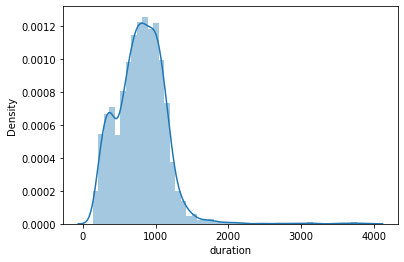

In [20]:
#let's see the distribution of duration
sns.distplot(data[data['duration'] < 4000000]['duration'])

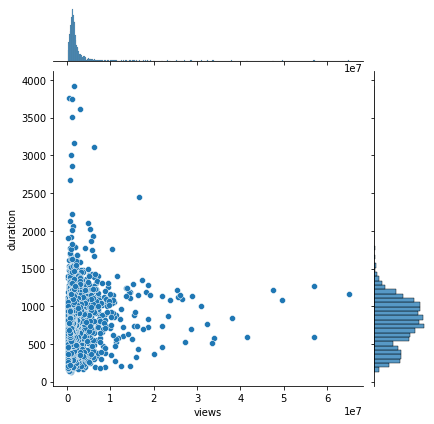

In [21]:
sns.jointplot(x='views', y='duration', data=data)

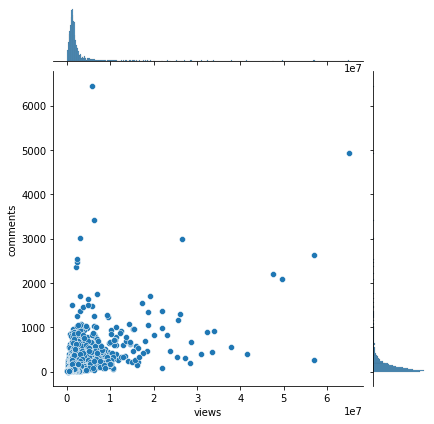

In [22]:
sns.jointplot(x='views', y='comments', data=data)

Text(0.5, 0, 'Number of Comments')

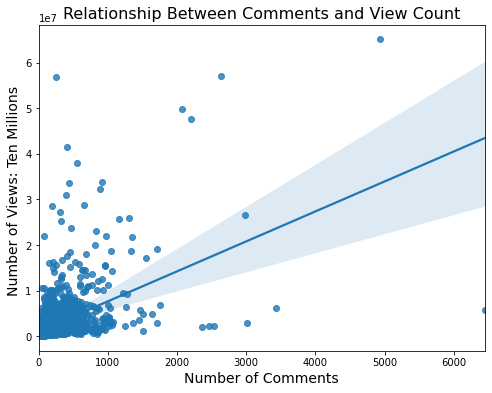

In [23]:
#comments vs. View Counts
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='comments',y='views')
plt.title("Relationship Between Comments and View Count", fontsize = 16)
plt.ylabel("Number of Views: Ten Millions ", fontsize = 14)
plt.xlabel("Number of Comments", fontsize = 14)

In [24]:
#creating a dataframe with highest views extracted.
df1=data.nlargest(10,['views'])
df1[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
1898,Bill Gates,33521780,The next outbreak? We're not ready
2057,Robert Waldinger,32396714,What makes a good life? Lessons from the longe...


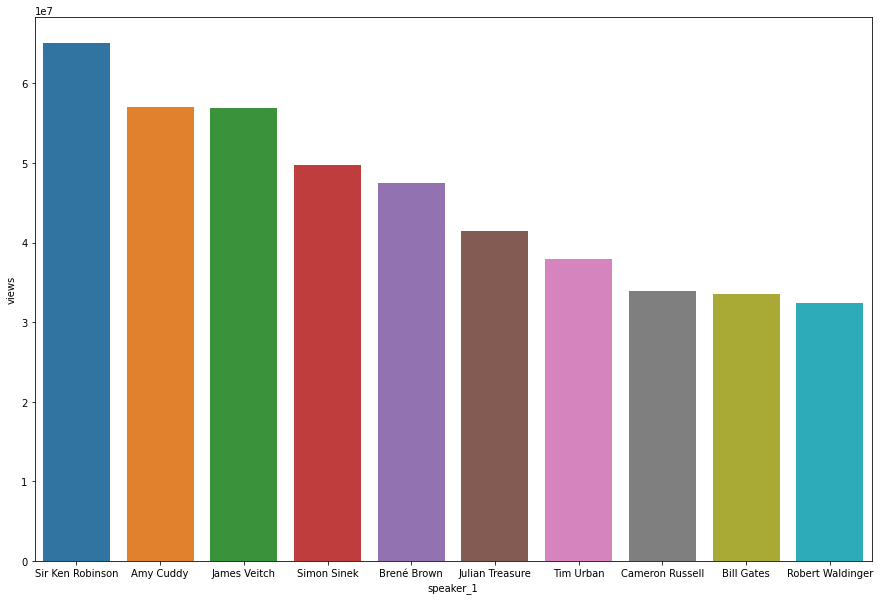

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='speaker_1',y='views',data=df1)

In [26]:
#getting the unique columns length in the event column
len(data['event'].unique())

428

In [27]:
#let's see the most frequent event category
df2=data[['event','views']].groupby('event').agg({'views':'count'}).nlargest(10,['views'])
df2.reset_index(inplace=True)
df2

,event,views
0,TED2017,96
1,TED2018,95
2,TED2019,91
3,TED2014,83
4,TED2009,81
5,TED2015,75
6,TED2016,75
7,TED2013,74
8,TED2011,69
9,TEDGlobal 2012,69


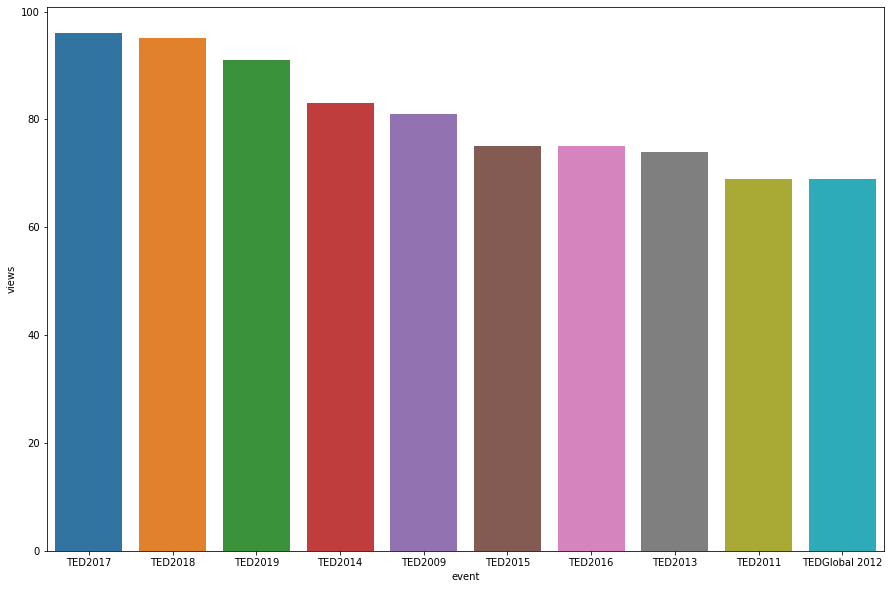

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2['event'],y=df2['views'])

# Treating the Outliers

In [29]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

about_speakers      0
all_speakers        0
available_lang      0
comments          261
description         0
duration           35
event               0
native_lang         0
occupations         0
published_date      0
recorded_date       0
related_talks       0
speaker_1           0
title               0
topics              0
transcript          0
views             340
dtype: int64

In [30]:
# Replacing outliers with extreme values

for i in ['comments','duration','views']:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  data[i]=np.where(data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),data[i]))

In [31]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

about_speakers    0
all_speakers      0
available_lang    0
comments          0
description       0
duration          0
event             0
native_lang       0
occupations       0
published_date    0
recorded_date     0
related_talks     0
speaker_1         0
title             0
topics            0
transcript        0
views             0
dtype: int64

In [32]:
#creating a list of events
event_list=list(data['event'].unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [33]:
#since we have the encoded events column, we can drop the orignal event column
data=data.drop('event',axis=1)

Necessary installation for target encoding

In [34]:
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 5.4MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
encoder=ce.TargetEncoder()
data_final=encoder.fit_transform(data,data['views'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
data_final.shape

(3338, 16)

In [37]:
data_final.dtypes

title             float64
speaker_1         float64
all_speakers      float64
occupations       float64
about_speakers    float64
views             float64
recorded_date     float64
published_date    float64
native_lang       float64
available_lang    float64
comments          float64
duration          float64
topics            float64
related_talks     float64
description       float64
transcript        float64
dtype: object

Imputing Train_Test Split

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 

In [39]:
x=data_final.iloc[:,data.columns !='views']
x.shape

(3338, 15)

In [40]:
y=data_final['views']
y.shape

(3338,)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
y_train.shape

(2503,)

Laso Implementation

In [42]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)

mean_squared_error=np.mean((y_pred1-y_test)**2)
print('MSE on test set=',mean_squared_error)
lasso_coeff=pd.DataFrame()
lasso_coeff['Columns']=x_train.columns
lasso_coeff['Coefficient Estimate']=pd.Series(lasso.coef_)

print(lasso_coeff)

MSE on test set= 531983836042.63165
           Columns  Coefficient Estimate
0            title             -0.000000
1        speaker_1              0.639611
2     all_speakers             -1.271666
3      occupations              0.517963
4   about_speakers              1.031874
5    recorded_date              0.662890
6   published_date              0.526451
7      native_lang              0.505685
8   available_lang              0.541698
9         comments           2526.644500
10        duration             16.447513
11          topics              0.509814
12   related_talks             -0.000000
13     description             -0.000000
14      transcript             -0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671029316841515.9, tolerance: 265278665976.1557
  positive)


Imputing ExtraTrees 

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model1=ExtraTreesRegressor()
model1.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred2=model1.predict(x_test)
print("MSE={}".format(np.mean(y_pred2-y_test)**2))

MSE=265882752.6773976


In [45]:
imp_features1=pd.Series(model1.feature_importances_,index=x.columns).sort_values(ascending=False)
imp_features1

comments          0.311274
recorded_date     0.199579
duration          0.117697
occupations       0.116480
speaker_1         0.072045
published_date    0.066426
all_speakers      0.055651
about_speakers    0.043795
available_lang    0.009259
native_lang       0.004377
topics            0.003418
transcript        0.000000
description       0.000000
related_talks     0.000000
title             0.000000
dtype: float64

Imputing DecisionTree

In [46]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)
y_pred3=model2.predict(x_test)
print("MSE={}".format(np.mean(y_pred3-y_test)**2))

MSE=1230126102.9451478


In [46]:
#@markdown Since ExtraTreesRegressor gave us comparitively less error we can consider it for feature selection

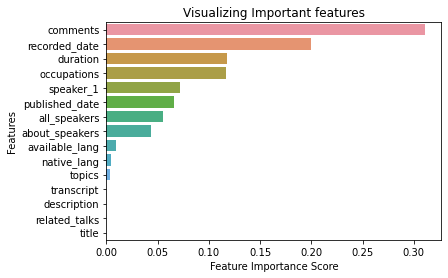

In [47]:
#visualising the feature importance
sns.barplot(x=imp_features1,y=imp_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

Dropping the unimportant features

In [48]:
#dropping the last few columns with the lowest scores.
data_final1=data_final.drop(columns=['native_lang','transcript','description','related_talks','title','available_lang','topics'])
data_final1.shape

(3338, 9)

In [49]:
x_final=data_final1.iloc[:,data_final1.columns !='views']
y_final=data_final1['views']
x_final.shape

(3338, 8)

Doing the train_test Split

In [50]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_final,y_final,test_size=0.25)
y_train1.shape

(2503,)

Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

Imputing the Hyperparameter Tuning

In [52]:
#using grid search to tune the hyperparameters

n_estimators=[100,150,200]
max_depth=[5,9,11]

param_dict={'n_estimators':n_estimators,
            'max_depth':max_depth}

model4=RandomForestRegressor()

grid=GridSearchCV(estimator=model4,param_grid=param_dict,verbose=1,cv=KFold())
result=grid.fit(x_train1,y_train1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   32.5s finished


In [53]:
# Summarize the results
print('Best : {}, using {}'.format(result.best_score_,result.best_params_))

Best : 0.47471719066803225, using {'max_depth': 9, 'n_estimators': 200}


In [54]:
model5=RandomForestRegressor(max_depth=11,n_estimators=150)
model5.fit(x_train1,y_train1)
y_pred4=model5.predict(x_test1)
print('MSE={}'.format(np.mean(y_pred4-y_test1)**2))

MSE=93651827.5323348


Using Extratrees Regressor after feature selection

In [56]:
model6=ExtraTreesRegressor()
model6.fit(x_train1,y_train1)
y_pred5=model6.predict(x_test1)
print("MSE={}".format(np.mean(y_pred5-y_test1)**2))

MSE=142586654.9271068


Imputing Isolation Forest

In [57]:
from sklearn.ensemble import IsolationForest
model7=IsolationForest(n_estimators=200,max_samples='auto',contamination=float(0.1))
model7.fit(x_train1,y_train1)
y_pred6=model7.predict(x_test1)
print("MSE={}".format(np.mean(y_pred6-y_test1)**2))

MSE=2722607603787.7603


Imputing AdaBoost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor
model8=AdaBoostRegressor(n_estimators=500)
model8.fit(x_train1,y_train1)
y_pred7=model8.predict(x_test1)
print("MSE={}".format(np.mean(y_pred7-y_test1)**2))

MSE=42087957904.64468
